# Assignment 4: Logistic Regression {-}

## Overview

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to:

- Analyze the data.
- Process the data.
- Split train/test sets.
- Train a Logistic Regression model using the training set, then make prediction on the test set.
- Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-Summer22-\<StudentID>-Assignment4 (e.g., DataViz- Summer22-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you split the data for training and testing purpose, then build a classification model and evaluate its performance.

Note that the evaluation will not consider the model accuracy as the highest priority, but how properly you handle the data and use scikit-learn to build the classifier.

### Deadline {-}
Please visit Canvas for details.


## Solution

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [41]:
df = pd.read_csv('heart-disease.csv')

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


#### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
#### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

### Data Exploration

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB
None


The dataset contains 886 samples with 13 different data features and 1 target label. There is also no null value in the entire dataframe, which is quite extraordinary. Thirdteen out of fourteen columns has intergral values, only 'oldpeak' has float datatype. This means that we do not need to transform any data column prior to building the model.

In [44]:
# viewing the data's statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


No statistics seem out of order. Stark differences among the value ranges of the data features require us to normalize them before building our models.

In [45]:
#checking duplicates in the dataset
df.duplicated().value_counts()

False    886
dtype: int64

The dataset does not have any duplicates.

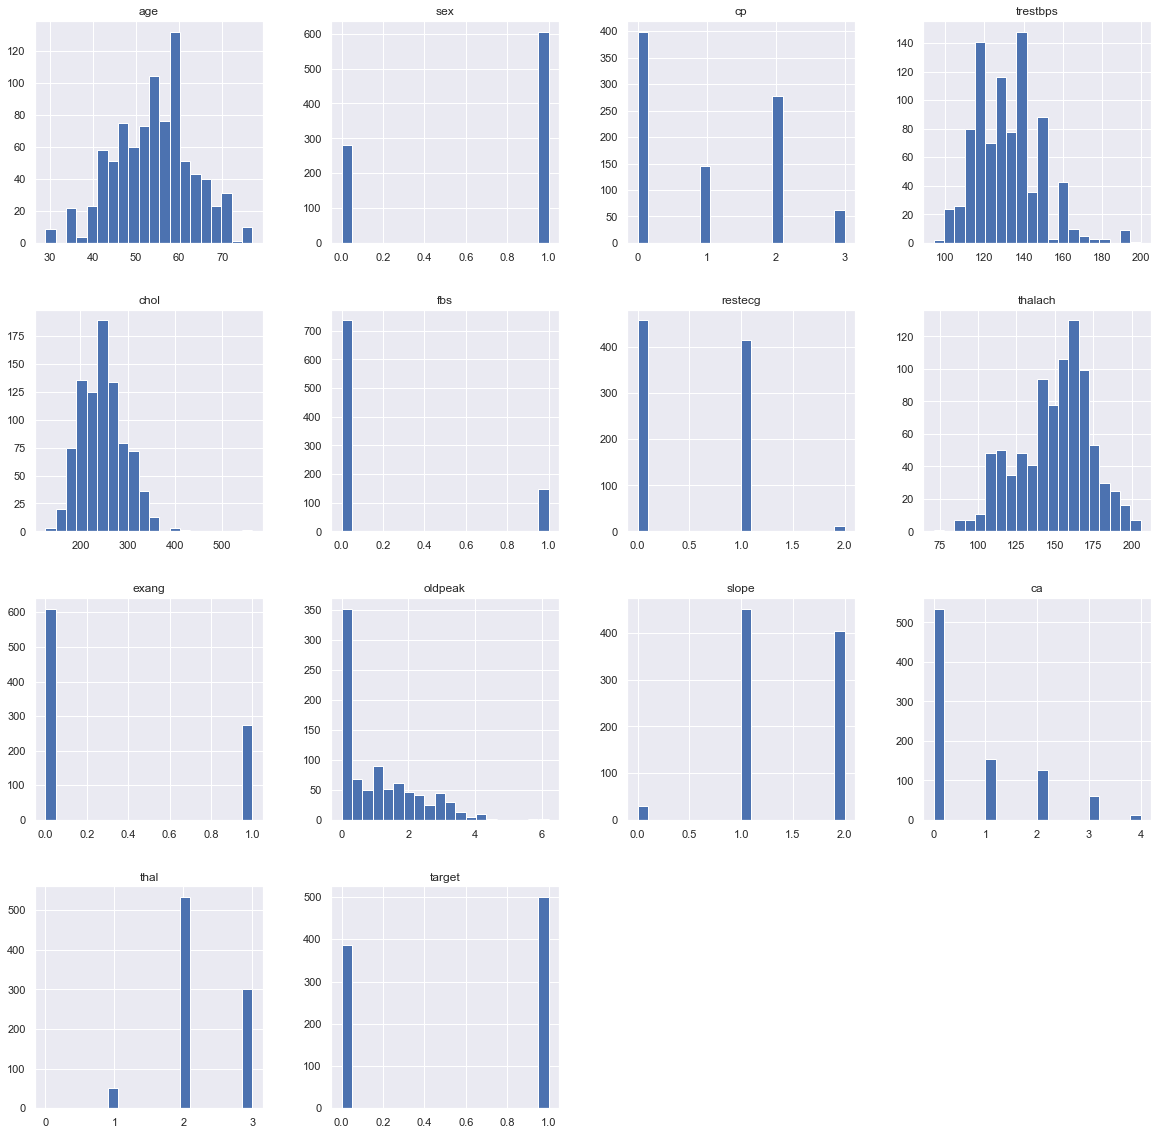

In [46]:
# viewing the distribution of dataset
df.hist(figsize = (20,20), bins = 20)
plt.show()

The distributions of continuous variables seem pretty 'normal. However, there exist substantial imbalance in categorical data.

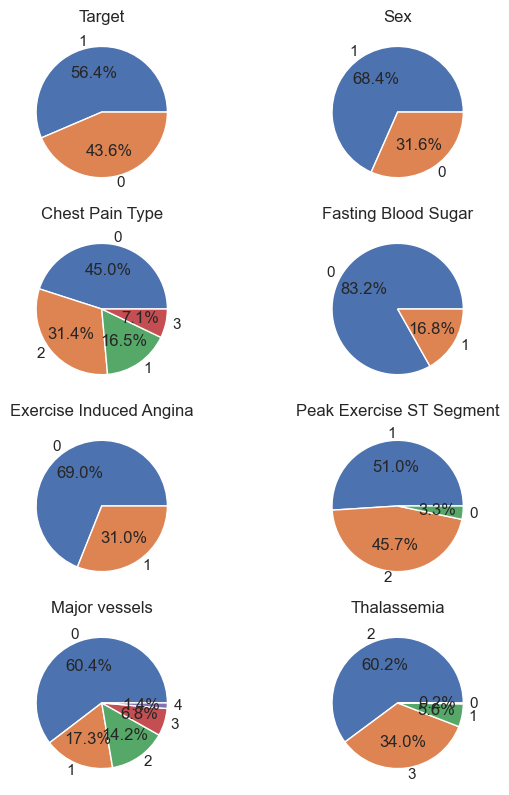

In [47]:
# viewing the proportion of categoritcal data features
fig, ax = plt.subplots(4,2, figsize = (7,10), dpi = 100)

ax[0,0].pie(df['target'].value_counts(), labels = df['target'].value_counts().index, autopct='%1.1f%%')
ax[0,1].pie(df['sex'].value_counts(), labels = df['sex'].value_counts().index, autopct = '%1.1f%%')
ax[1,0].pie(df['cp'].value_counts(), labels = df['cp'].value_counts().index, autopct = '%1.1f%%')
ax[1,1].pie(df['fbs'].value_counts(), labels = df['fbs'].value_counts().index, autopct = '%1.1f%%')
ax[2,0].pie(df['exang'].value_counts(), labels = df['exang'].value_counts().index, autopct = '%1.1f%%')
ax[2,1].pie(df['slope'].value_counts(), labels = df['slope'].value_counts().index, autopct = '%1.1f%%')
ax[3,0].pie(df['ca'].value_counts(), labels = df['ca'].value_counts().index, autopct = '%1.1f%%')
ax[3,1].pie(df['thal'].value_counts(), labels = df['thal'].value_counts().index, autopct = '%1.1f%%')

ax[0,0].set_title('Target')
ax[0,1].set_title('Sex')
ax[1,0].set_title('Chest Pain Type')
ax[1,1].set_title('Fasting Blood Sugar')
ax[2,0].set_title('Exercise Induced Angina')
ax[2,1].set_title('Peak Exercise ST Segment')
ax[3,0].set_title('Major vessels')
ax[3,1].set_title('Thalassemia')

plt.show()

Substantial class imbalances can be observed across data features as well as data labels. This must be taken into consideration when assessing the performance of the model.

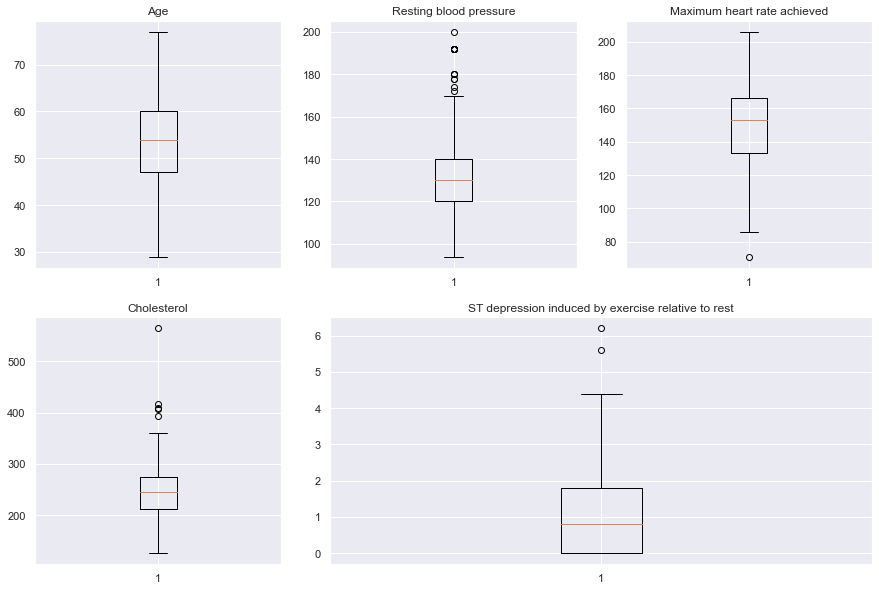

In [48]:
#viewing potential outlier in the dataset
fig = plt.figure (figsize = (15,10))

ax0 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan= 1)
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), colspan= 1)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), colspan= 1)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan= 1)
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 1), colspan= 2)

ax0.boxplot(df['age'])
ax1.boxplot(df['trestbps'])
ax2.boxplot(df['thalach'])
ax3.boxplot(df['chol'])
ax4.boxplot(df['oldpeak'])

ax0.set_title('Age')
ax1.set_title('Resting blood pressure')
ax2.set_title('Maximum heart rate achieved')
ax3.set_title('Cholesterol')
ax4.set_title('ST depression induced by exercise relative to rest')

plt.show()


In [49]:
#inspecting apparent outlier
df[df['chol'] == df['chol'].max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
755,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [50]:
df[df['trestbps'] == df['trestbps'].max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
767,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [51]:
df[df['thalach'] == df['thalach'].min()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
799,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


The dataset seems to contain outliers. However, upon closer inspection, these apparent outliers still fit the data nature, that is, their occurence does exist in reality (the highest cholesterol levels recorded reach 564 mm/hg, which can be a case of severe hypercholesterolemia while the highest resting blood pressure is around 200 mm/hg, which can a case of hypertension). While I am skeptical that one can only has the maximum heart rate of 71, I do not have enough ground to remove this sample.

In [52]:
# viewing correlation between features
df.corr().describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.114789,0.059099,0.065290,0.113375,0.083708,0.088065,0.058913,0.041721,0.022720,0.050877,0.046846,0.092553,0.081137,-0.011752
std,0.330996,0.316708,0.370577,0.289678,0.300030,0.287187,0.290375,0.411266,0.390331,0.396816,0.376069,0.363322,0.334975,0.470314
min,-0.364585,-0.283901,-0.434926,-0.194818,-0.280802,-0.145109,-0.241043,-0.420237,-0.492947,-0.540943,-0.503280,-0.489730,-0.443080,-0.540943
25%,-0.068453,-0.092284,-0.175523,-0.052000,-0.072632,-0.074853,-0.072731,-0.255667,-0.258859,-0.151132,-0.176653,-0.180738,-0.105404,-0.403285
50%,0.106165,0.039050,0.030197,0.058635,0.014628,-0.001818,-0.014209,-0.066905,0.059676,0.106988,-0.038312,0.181877,0.051378,-0.144008
75%,0.251217,0.128995,0.130461,0.166402,0.155816,0.149069,0.088326,0.308223,0.203980,0.257020,0.135372,0.218122,0.206041,0.345188
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


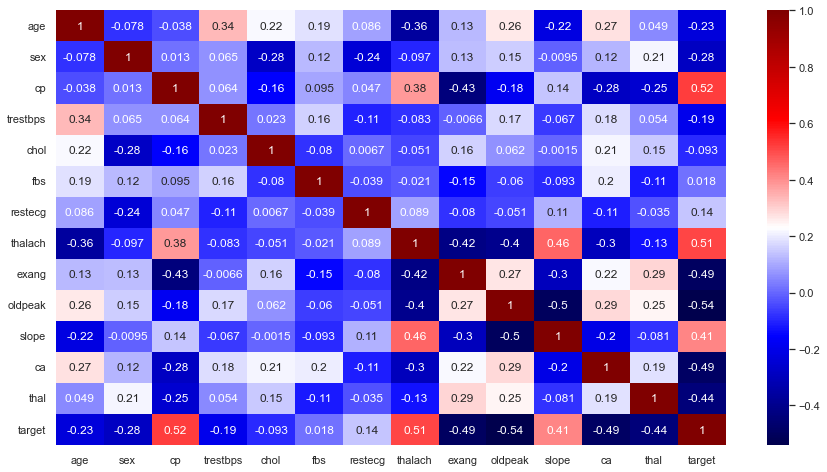

In [53]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), cmap = 'seismic', annot = True)
plt.show()

Chest pain, maximum heart rate and the slope of peak exercise ST segment have strong correlation with the heart disease while exercise-induced angina and ST depression as well as the number of major blood vessels negatively correlate with heart diseases.

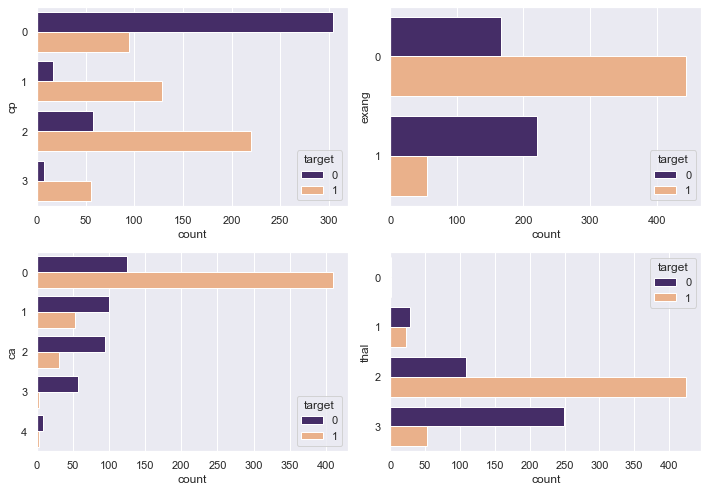

In [54]:
fig1, axh = plt.subplots(2,2, figsize = (10,7), tight_layout = True)

color = ['#432371',"#FAAE7B"]

sns.countplot(data = df,ax = axh[0,0], y = 'cp', hue = 'target', palette= color)
sns.countplot(data = df, ax = axh[0,1], y = 'exang', hue = 'target', palette= color)
sns.countplot(data = df, ax = axh[1,0], y = 'ca', hue = 'target', palette= color)
sns.countplot(data = df, ax = axh[1,1], y = 'thal', hue = 'target', palette= color)

plt.show()


### Data Processing

***As have been seen from the data exploration stage, there do not exist any nulls, outliers or duplicates in the dataset. We also do not need to transform any data features into numerical values to feed into the model***

##### Splitting Data

In [55]:
# specifying data features and data label
feature = df.columns.tolist()
feature.remove('target')        # Get feature names.
feature_data = df[feature]        # creating a dataframe with only the feature data
label_data = df['target']   

In [56]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
trainX,testX, trainY, testY = train_test_split(feature_data, label_data, train_size=0.70, random_state=35)
print("trainX: " + str(trainX.shape))
print("trainY: " + str(trainY.shape))
print("testX: " + str(testX.shape))
print("trainY: " + str(trainY.shape))

trainX: (620, 13)
trainY: (620,)
testX: (266, 13)
trainY: (620,)


##### Data Scaling

**Standardized data**

In [57]:
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
scaler.fit(trainX)       # Fit the scaler to the training data
stand_trainX = scaler.transform(trainX)            #transforming the training data using the statistics from training data           
stand_testX = scaler.transform(testX)              #transforming the testing data using the statistics from training data 

**Min-Max Scaling**

In [58]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmax_trainX = scaler.fit_transform(trainX)
minmax_testX = scaler.transform(testX)

### Building Model

#### Standardized data

In [59]:
# initializing the model
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()
logmodel1.fit(stand_trainX, trainY)

LogisticRegression()

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

print("Confusion matrix: \n", confusion_matrix(logmodel1.predict(stand_testX), testY))
print("Precision score: \n", precision_score(logmodel1.predict(stand_testX), testY))
print("Recall score: \n", recall_score(logmodel1.predict(stand_testX), testY))
print("Classification report: \n", classification_report(logmodel1.predict(stand_testX), testY))

Confusion matrix: 
 [[117   4]
 [  7 138]]
Precision score: 
 0.971830985915493
Recall score: 
 0.9517241379310345
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       121
           1       0.97      0.95      0.96       145

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



In [61]:
coefficients1 = pd.concat([pd.DataFrame(trainX.columns, columns = ['feature']),pd.DataFrame(np.transpose(logmodel1.coef_), columns= ['weight'])], axis = 1)
coefficients1.sort_values('weight', axis = 0)

,feature,weight
9,oldpeak,-1.302636
11,ca,-1.147654
1,sex,-0.964502
12,thal,-0.813926
3,trestbps,-0.720856
8,exang,-0.501052
4,chol,-0.114357
0,age,-0.057168
6,restecg,0.236853
5,fbs,0.295229


In [62]:
from sklearn.model_selection import cross_validate
pd.DataFrame(cross_validate(logmodel1, feature_data, label_data, scoring = ['f1', 'precision', 'recall'], cv = 10)).describe()

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,fit_time,score_time,test_f1,test_precision,test_recall
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.034151,0.007603,0.925195,0.908526,0.944000
std,0.016689,0.004362,0.080106,0.080639,0.088343
min,0.020734,0.000000,0.775510,0.791667,0.760000
25%,0.024231,0.005810,0.886064,0.847925,0.915000
50%,0.026619,0.008031,0.943396,0.892857,1.000000
75%,0.038439,0.009830,0.997525,0.995098,1.000000
max,0.074713,0.013147,1.000000,1.000000,1.000000


#### Min-Max Normalized Data

In [63]:
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression()
logmodel2.fit(minmax_trainX, trainY)

LogisticRegression()

In [64]:
print("Confusion matrix: \n", confusion_matrix(logmodel2.predict(minmax_testX), testY))
print("Precision score: \n", precision_score(logmodel2.predict(minmax_testX), testY))
print("Recall score: \n", recall_score(logmodel2.predict(minmax_testX), testY))
print("Classification report: \n", classification_report(logmodel2.predict(minmax_testX), testY))

Confusion matrix: 
 [[117   4]
 [  7 138]]
Precision score: 
 0.971830985915493
Recall score: 
 0.9517241379310345
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       121
           1       0.97      0.95      0.96       145

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



In [65]:
coefficients2 = pd.concat([pd.DataFrame(trainX.columns, columns = ['feature']),pd.DataFrame(np.transpose(logmodel2.coef_), columns= ['weight'])], axis = 1)
coefficients2.sort_values('weight', axis = 0)

,feature,weight
9,oldpeak,-1.302636
11,ca,-1.147654
1,sex,-0.964502
12,thal,-0.813926
3,trestbps,-0.720856
8,exang,-0.501052
4,chol,-0.114357
0,age,-0.057168
6,restecg,0.236853
5,fbs,0.295229


In [66]:
pd.DataFrame(cross_validate(logmodel2, feature_data, label_data, scoring = ['f1', 'precision', 'recall'], cv = 10)).describe()

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,fit_time,score_time,test_f1,test_precision,test_recall
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.037321,0.005663,0.925195,0.908526,0.944000
std,0.017492,0.002711,0.080106,0.080639,0.088343
min,0.019721,0.002060,0.775510,0.791667,0.760000
25%,0.026488,0.004138,0.886064,0.847925,0.915000
50%,0.028819,0.005305,0.943396,0.892857,1.000000
75%,0.046342,0.007601,0.997525,0.995098,1.000000
max,0.072898,0.010092,1.000000,1.000000,1.000000


Standardized and Min-Max Normalized models perform identically and consistently (with reasonably small STD). Another good characteristics of the model is that it has high recall level, which is needed since the model try to predict whether one has heart disease or not. ST depression induced by exercise relative to rest and chest pain seem to be highly indicative of heart diseases.

#### Standardized Polymonial Model
I read (after splitting the data and standardize it) that standardization should happen after generating polymonial features, which is quite reasonable. So the data processing step will be repeated here

In [67]:
#preparing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures

X_poly = []

#generating polymonial data
for i in [1, 2, 3, 4, 5, 6]:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly.append(poly_reg.fit_transform(feature_data))

In [68]:
#splitting data

poly_trainX =[]
poly_testX =[]
poly_trainY =[]
poly_testY = []

for i in [0, 1, 2, 3, 4, 5]:
    poly_trainX.append(train_test_split(X_poly[i], label_data, train_size=0.70, random_state=35)[0])
    poly_testX.append(train_test_split(X_poly[i], label_data, train_size=0.70, random_state=35)[1])
    poly_trainY.append(train_test_split(X_poly[i], label_data, train_size=0.70, random_state=35)[2])
    poly_testY.append(train_test_split(X_poly[i], label_data, train_size=0.70, random_state=35)[3])


In [69]:
# standardize the polymonial data

standardization = []
stand_poly_testX =[]
stand_poly_trainX =[]

for i in [0 , 1 , 2 , 3 , 4 , 5]:
    standardization.append(StandardScaler())                   # Initialize the StandardScalers
    standardization[i].fit(poly_trainX[i])       # Fit the scaler to the training data
    stand_poly_trainX.append(standardization[i].transform(poly_trainX[i])  )          #transforming the training data using the statistics from training data           
    stand_poly_testX.append(standardization[i].transform(poly_testX[i]))           #transforming the testing data using the statistics from training data 

In [70]:
# building the model
poly_logmodel = []
for i in [0, 1, 2, 3, 4 , 5]:
    poly_logmodel.append(LogisticRegression())
    poly_logmodel[i].fit(stand_poly_trainX[i], poly_trainY[i])
    # evaluating the model
    print("Confusion matrix for", i + 1, 'degree: \n',  confusion_matrix(poly_logmodel[i].predict(stand_poly_testX[i]), poly_testY[i]))
    print("Classification report for", i + 1, 'degree: \n', classification_report(poly_logmodel[i].predict(stand_poly_testX[i]), poly_testY[i]))  

Confusion matrix for 1 degree: 
 [[117   4]
 [  7 138]]
Classification report for 1 degree: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       121
           1       0.97      0.95      0.96       145

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266

Confusion matrix for 2 degree: 
 [[114   3]
 [ 10 139]]
Classification report for 2 degree: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       117
           1       0.98      0.93      0.96       149

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266

Confusion matrix for 3 degree: 
 [[113   4]
 [ 11 138]]
Classification report for 3 degree: 
               precision    recall  f1-score   support

         

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Confusion matrix for 4 degree: 
 [[113   5]
 [ 11 137]]
Classification report for 4 degree: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       118
           1       0.96      0.93      0.94       148

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix for 5 degree: 
 [[113   5]
 [ 11 137]]
Classification report for 5 degree: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       118
           1       0.96      0.93      0.94       148

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266

Confusion matrix for 6 degree: 
 [[113   4]
 [ 11 138]]
Classification report for 6 degree: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       117
           1       0.97      0.93      0.95       149

    accuracy                           0.94       266
   macro avg       0.94      0.95      0.94       266
weighted avg       0.95      0.94      0.94       266



c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


While the precision of the 2 degree polymonial model is greater than that of 1, the 1 degree model should be better as it has higher recall score, which is what matters more given the purpose of the model to diagnose heart disease.

### Failure

In [71]:
# I cannnot view the cross validation results
from sklearn.model_selection import cross_validate
for i in [0, 1, 2, 3, 4 , 5]:
    pd.DataFrame(cross_validate(poly_logmodel[i], X_poly[i], label_data, scoring = ['f1', 'precision', 'recall'], cv = 10)).describe()

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

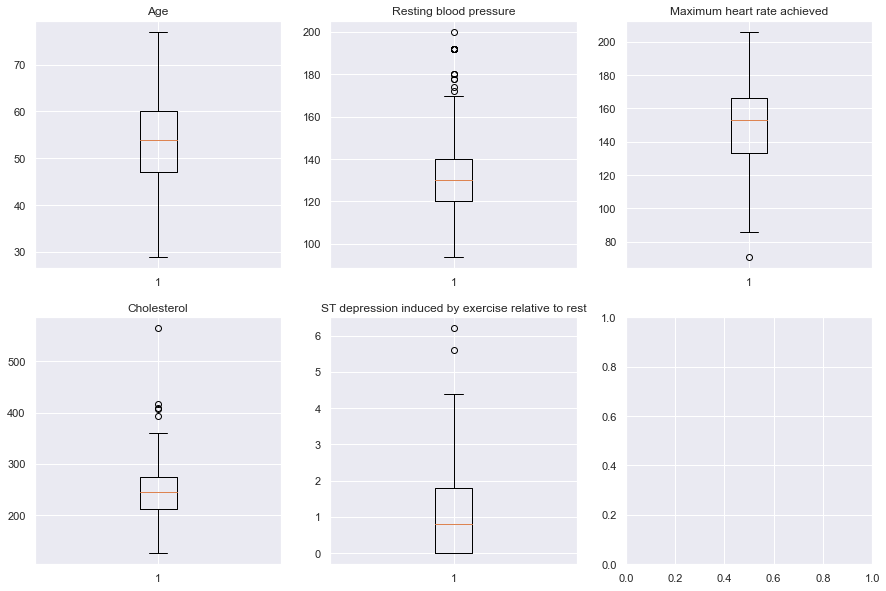

In [72]:
fig, ax = plt.subplots(2,3, figsize = (15,10))

ax[0,0].boxplot(df['age'])
ax[0,1].boxplot(df['trestbps'])
ax[0,2].boxplot(df['thalach'])
ax[1,0].boxplot(df['chol'])
ax[1,1].boxplot(df['oldpeak'])

ax[0,0].set_title('Age')
ax[0,1].set_title('Resting blood pressure')
ax[0,2].set_title('Maximum heart rate achieved')
ax[1,0].set_title('Cholesterol')
ax[1,1].set_title('ST depression induced by exercise relative to rest')

plt.show()

#### Removing outliers

In [73]:
# idenitfying outliers with IsolationForest
from sklearn.ensemble import IsolationForest
#create the method instance
isf = IsolationForest(random_state = 35)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df[["age", "sex", "cp", 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope' , 'ca', 'thal', 'target']])
#extract outliers from the data
iso_forest_outliers = preds
iso_forest_outliers = iso_forest_outliers.astype(str)
#extract the scores from the data in terms of strength of outlier
iso_forest_score = isf.decision_function(df[["age", "sex", "cp", 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope' , 'ca', 'thal', 'target']])
#print how many outliers the data suggests
print(pd.Series(iso_forest_outliers).value_counts())

1     551
-1    335
dtype: int64


Over half of the dataset are outliers, which is ridiculous.

In [74]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit_predict(df)
clf.negative_outlier_factor_

array([-0.88888889, -0.91111111, -0.91111111, -1.03947368, -1.03947368,
       -1.10833333, -1.03947368, -1.03947368, -1.03947368, -1.10833333,
       -0.91111111, -0.91111111, -1.03947368, -1.03947368, -1.10833333,
       -1.03947368, -1.03947368, -1.03947368, -1.10833333, -0.92417494,
       -0.94602407, -1.0619558 , -1.0619558 , -1.13206445, -0.99657692,
       -0.99657692, -1.01243812, -1.05473306, -0.91111111, -0.91111111,
       -1.03947368, -1.03947368, -1.10833333, -1.03947368, -1.03947368,
       -1.03947368, -1.10833333, -0.93333333, -0.93333333, -1.06447368,
       -1.06447368, -1.13472222, -0.93333333, -1.06447368, -1.06447368,
       -1.13472222, -0.91111111, -0.91111111, -1.03947368, -1.03947368,
       -1.10833333, -1.03947368, -1.03947368, -1.03947368, -1.10833333,
       -0.91111111, -1.03947368, -1.03947368, -1.03947368, -1.10833333,
       -0.91111111, -1.03947368, -1.03947368, -1.10833333, -0.91111111,
       -0.91111111, -1.03947368, -1.03947368, -1.10833333, -1.03

In [75]:
clf.negative_outlier_factor_.std()

0.735533024764326

In [76]:
X = []
for i in clf.negative_outlier_factor_:
    if i < 0 and i > -2:
        X.append(i)
len(X)


775

In [78]:
from sklearn.model_selection import cross_val_score, cross_validate
scores1 = cross_val_score(logmodel1, feature_data, label_data, cv=10)
print(pd.DataFrame(scores1).describe())

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

               0
count  10.000000
mean    0.913956
std     0.090005
min     0.750000
25%     0.866477
50%     0.932201
75%     0.997191
max     1.000000


c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [79]:
#I could not get it to review the result
for i in [0,1,2,3]:
    pd.DataFrame(cross_validate(poly_logmodel[i], X_poly[i], label_data, scoring = ['f1', 'precision', 'recall'], cv = 10)).describe()  

c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

##### Polynomial Data

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_poly_train = []
X_poly_test = []
X_poly = []

for i in [2, 3, 4, 5, 6]:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train.append(poly_reg.fit_transform(stand_trainX))
    X_poly_test.append(poly_reg.transform(stand_testX))
    X_poly.append(poly_reg.transform(feature_data))

c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warning

In [ ]:
# checking if my code yields the desired result
poly_reg3 = PolynomialFeatures(degree=3)
a = poly_reg3.fit_transform(stand_trainX)
print((a == X_poly_train[1]).all())

NameError: name 'PolynomialFeatures' is not defined

#### Standarized Polymonial Models

In [ ]:
poly_logmodel = []
for i in [0, 1, 2, 3, 4]:
    poly_logmodel.append(LogisticRegression())
    poly_logmodel[i].fit(X_poly_train[i], trainY)
    print("Confusion matrix:", confusion_matrix(poly_logmodel[i].predict(X_poly_test[i]), testY))
    print("Classification report: \n", classification_report(poly_logmodel[i].predict(X_poly_test[i]), testY))  

Confusion matrix: [[111   9]
 [ 13 133]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.94      0.91      0.92       146

    accuracy                           0.92       266
   macro avg       0.92      0.92      0.92       266
weighted avg       0.92      0.92      0.92       266

Confusion matrix: [[115   4]
 [  9 138]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       119
           1       0.97      0.94      0.96       147

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266



c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix: [[110   7]
 [ 14 135]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       117
           1       0.95      0.91      0.93       149

    accuracy                           0.92       266
   macro avg       0.92      0.92      0.92       266
weighted avg       0.92      0.92      0.92       266



c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix: [[113   6]
 [ 11 136]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       119
           1       0.96      0.93      0.94       147

    accuracy                           0.94       266
   macro avg       0.93      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266

Confusion matrix: [[109   8]
 [ 15 134]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       117
           1       0.94      0.90      0.92       149

    accuracy                           0.91       266
   macro avg       0.91      0.92      0.91       266
weighted avg       0.92      0.91      0.91       266



c:\Users\PV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
